In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

## Load rating data

In [2]:
rating_data = pd.read_csv('../data/ratings.dat.txt', sep="::",
                          names=['user_id', 'movie_id', 'rating', 'rating_timestamp'],
                          engine='python')
rating_data

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524
...,...,...,...,...
915365,71257,9893250,10,1613857551
915366,71257,9898858,3,1585958452
915367,71258,172495,10,1587107015
915368,71258,414387,10,1587107852


In [3]:
rating_data['rating_timestamp'] = pd.to_datetime(rating_data['rating_timestamp'], unit='s')
rating_data

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,2013-10-05 21:00:50
1,2,499549,9,2013-08-17 15:26:38
2,2,1305591,8,2013-08-17 12:28:27
3,2,1428538,1,2013-06-15 14:38:09
4,3,75314,1,2020-07-23 01:42:04
...,...,...,...,...
915365,71257,9893250,10,2021-02-20 21:45:51
915366,71257,9898858,3,2020-04-04 00:00:52
915367,71258,172495,10,2020-04-17 07:03:35
915368,71258,414387,10,2020-04-17 07:17:32


## How many users and movies are mentioned in the dataset?

In [4]:
print(f"unique users : {rating_data['user_id'].nunique()}")

unique users : 71259


In [5]:
print(f"unique movies : {rating_data['movie_id'].nunique()}")

unique movies : 37704


## How old are the data points (number of datapoints pr year)

In [6]:
oldest = rating_data['rating_timestamp'].min()
newest = rating_data['rating_timestamp'].max()
per_year = rating_data['rating_timestamp'].dt.year.value_counts()

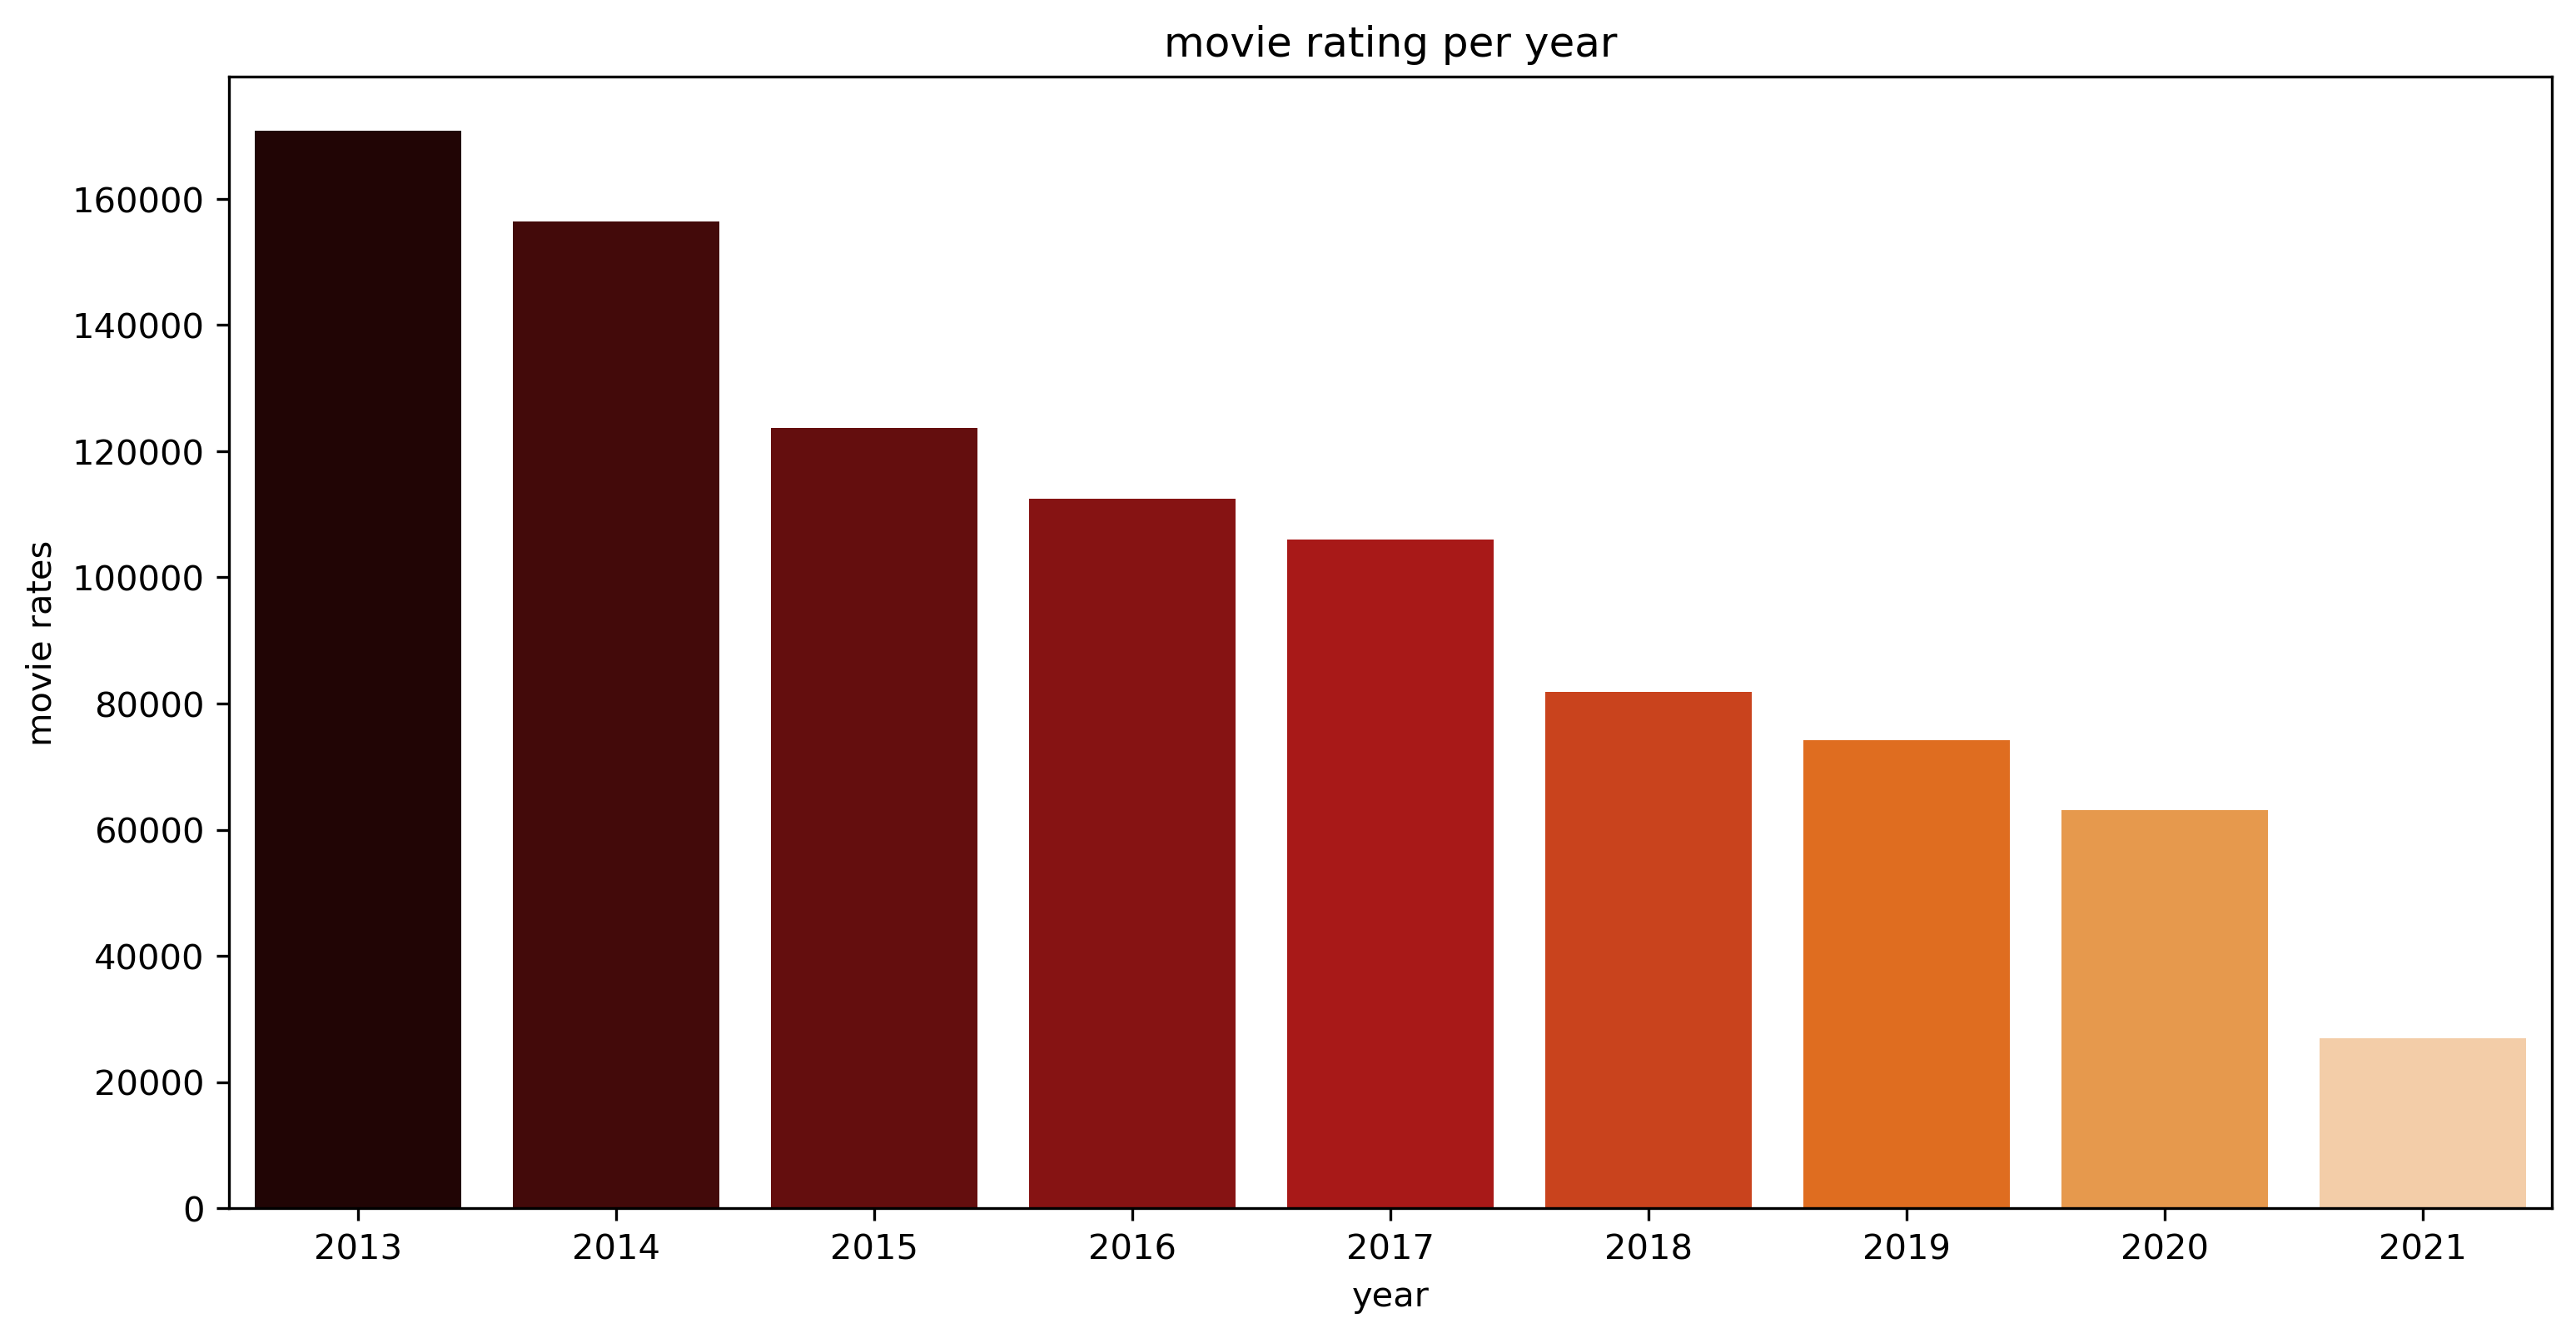

In [7]:
plt.figure(figsize=[12, 6], dpi=300)
sns.barplot(x=per_year.index,
            y=per_year.values,
            palette='gist_heat')
plt.xlabel('year')
plt.ylabel('movie rates')
plt.title('movie rating per year')
plt.show()

In [8]:
print(f"oldest rating date: {oldest}\n"
      f"latest rating date: {newest}")
print('-' * 80)
print('rating count per year:\n')

for index, value in per_year.iteritems():
    print(f'{index} -> {value}')

print('')
print(f"highest ratings done in a year {np.max(per_year)}. "
      f"most of data points are in between 2013 and 2016 "
      f"({np.round(np.sum(per_year.loc[2013:2016]) * 100 / rating_data.shape[0],2)}%).")

oldest rating date: 2013-02-28 14:38:27
latest rating date: 2021-08-16 03:08:03
--------------------------------------------------------------------------------
rating count per year:

2013 -> 170807
2014 -> 156354
2015 -> 123644
2016 -> 112455
2017 -> 105987
2018 -> 81870
2019 -> 74183
2020 -> 63126
2021 -> 26944

highest ratings done in a year 170807. most of data points are in between 2013 and 2016 (61.53%).


## How popular are popular movies - Looking at the data when will you say a movie is popular?